In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



In [2]:
# Set batch size and create an ImageDataGenerator object for training data
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
# Define the directory containing training data and specify classes explicitly
train_generator = train_datagen.flow_from_directory(
        'D:\\Rupesh_dai\\Dog-Breed-prediction\\Test2',
        target_size=(100, 100),
        batch_size=batch_size,
        classes = ['n02110958-pug', 'n02085782-Japanese_spaniel', 'n02112137-chow', 'human'],
        class_mode='categorical')

Found 1237 images belonging to 4 classes.


In [4]:
# Build the CNN architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])


In [5]:
# Compile the model with loss function, optimizer, and metrics
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])


In [6]:

# Train the model
total_sample = train_generator.n
n_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_sample/batch_size),
    epochs=n_epochs,
    verbose=1)


Epoch 1/20
 7/38 [====>.........................] - ETA: 18s - loss: 1.4686 - acc: 0.4695

c:\Python311\Lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 [==============================] - 27s 673ms/step - loss: 1.2797 - acc: 0.5187
Epoch 2/20
38/38 [==============================] - 19s 499ms/step - loss: 1.1962 - acc: 0.5212
Epoch 3/20
38/38 [==============================] - 19s 492ms/step - loss: 1.1010 - acc: 0.5427
Epoch 4/20
38/38 [==============================] - 19s 495ms/step - loss: 0.9786 - acc: 0.6091
Epoch 5/20
38/38 [==============================] - 19s 503ms/step - loss: 0.8401 - acc: 0.6672
Epoch 6/20
38/38 [==============================] - 21s 553ms/step - loss: 0.7582 - acc: 0.6998
Epoch 7/20
38/38 [==============================] - 20s 518ms/step - loss: 0.6827 - acc: 0.7477
Epoch 8/20
38/38 [==============================] - 19s 513ms/step - loss: 0.6024 - acc: 0.7784
Epoch 9/20
38/38 [==============================] - 19s 491ms/step - loss: 0.5371 - acc: 0.8091
Epoch 10/20
38/38 [==============================] - 18s 489ms/step - loss: 0.4371 - acc: 0.8390
Epoch 11/20
38/38 [==============================]

In [7]:
# Save the trained model
model.save('model4.h5')


In [8]:

# Test the model on a new image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model


In [9]:

# Load the saved model
model = load_model('model4.h5')


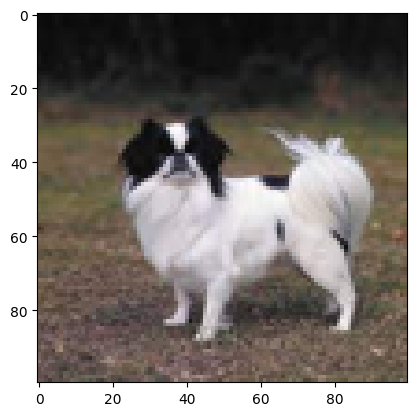

In [10]:

# Load the test image and preprocess it
test_image = Image.open('D:\\Rupesh_dai\\Dog-Breed-prediction\\download (3).jpeg')

test_image = test_image.resize((100, 100))
imageplot = plt.imshow(test_image)

x = np.array(test_image)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


In [11]:

# Make a prediction on the test image and print the predicted class
result = model.predict(images, batch_size=10)

if result[0][0] == 1:
    print("This is a Pug")
elif result[0][1] == 1:
    print("This is a Japanese spaniel")
elif result[0][2] == 1:
    print("This is a Chow")
elif result[0][3] == 1:
    print("This is human")
else:
    print("Sorry")


1/1 [==============================] - 0s 130ms/step
This is a Japanese spaniel


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

model = load_model('model4.h5')

test_image = Image.open('D:\\Rupesh_dai\\Dog-Breed-prediction\\download (3).jpeg')

test_image = test_image.resize((100, 100))
# imageplot = plt.imshow(test_image)

x = np.array(test_image)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

result = model.predict(images, batch_size=10)

if result[0][0] == 1:
    print("This is a Pug")
elif result[0][1] == 1:
    print("This is a Japanese spaniel")
elif result[0][2] == 1:
    print("This is a Chow")
elif result[0][3] == 1:
    print("This is human")
else:
    print("Sorry")

1/1 [==============================] - 0s 103ms/step
This is a Japanese spaniel


In [13]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'D:\\Rupesh_dai\\Dog-Breed-prediction\\Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'D:\\Rupesh_dai\\Dog-Breed-prediction\\Validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n//train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.n//validation_generator.batch_size)

# Save the model
model.save('model_transfer_learning.h5')


58889256/58889256 [==============================] - 9s 0us/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Rupesh_dai\\Dog-Breed-prediction\\Train'